<center> </center>



<center><font size=5 face="Helvetica" color=#306998><b>An Introduction to Classic Neural Networks</b></font></center>

<center><b><font face="Helvetica" size=2>Ang Chen</font></center></b>
<center><font face="Helvetica" size=3>February, 2022</font></center>

***

# Import base libraries

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 1. Building blocks: neurons

In [2]:
def sigmoid(x):
    # Our activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1-f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # Weight inputs, add bias, then use the activation function
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


In [3]:
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))


0.9990889488055994


# 2. Combining neurons into a neural network

In [4]:
class OurNeuralNetwork:
    '''
    A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
    Each neuron has the same weights and bias:
        - w = [0,1]
        - b = 0
    '''

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # Use the Neural class previous
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # The inputs of o1 are the outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1


network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x))


0.7216325609518421


# Training a neural network, part 1

## Code the MSE loss

In [5]:
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays with the same length
    return ((y_true-y_pred)**2).mean()


y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true,y_pred))


0.5


# Training a neural network, part 2

In [6]:
class NeuralNetwork:
    '''
    A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
    '''

    def __init__(self):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # x is a numpy array with 2 elements
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)

        return o1

    def train(self, data, all_y_trues, epochs):
        '''
        - data is a n*2 numpy array, n = # of samples in the dataset
        - all_y_trues is a numpy array with n elements, corresponding to those data in dataset
        - number of times to loop through the entire dataset
        '''
        learn_rate = 0.1
        epoch_data = np.empty(epochs)
        loss_data = np.empty(epochs)

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward
                sum_h1 = self.w1*x[0] + self.w2*x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3*x[0] + self.w4*x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5*h1 + self.w6*h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate the partial derivatives
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = 1.0 * deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = 1.0 * deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = 1.0 * deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            epoch_data[epoch] = epoch
            loss_data[epoch] = mse_loss(all_y_trues,np.apply_along_axis(self.feedforward, 1, data)) 

            np.save('loss.npy',np.vstack((epoch_data,loss_data)).T)  

            if epoch % 100 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))


In [7]:
# Define dataset
data = np.array([
    [-2, -1],  # Alice
    [25, 6],   # Bob
    [17, 4],   # Charlie
    [-15, -6],  # Diana
])

all_y_trues = np.array([
    1,  # Alice
    0,  # Bob
    0,  # Charlie
    1,  # Diana
])


In [8]:
# Train our neural network!
epochs = 2000
network = NeuralNetwork()
network.train(data, all_y_trues, epochs)


Epoch 0 loss: 0.311
Epoch 100 loss: 0.030
Epoch 200 loss: 0.012
Epoch 300 loss: 0.007
Epoch 400 loss: 0.005
Epoch 500 loss: 0.004
Epoch 600 loss: 0.003
Epoch 700 loss: 0.002
Epoch 800 loss: 0.002
Epoch 900 loss: 0.002
Epoch 1000 loss: 0.002
Epoch 1100 loss: 0.001
Epoch 1200 loss: 0.001
Epoch 1300 loss: 0.001
Epoch 1400 loss: 0.001
Epoch 1500 loss: 0.001
Epoch 1600 loss: 0.001
Epoch 1700 loss: 0.001
Epoch 1800 loss: 0.001
Epoch 1900 loss: 0.001


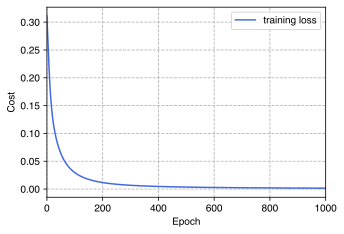

In [9]:
loss_data = np.load('loss.npy')

fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(loss_data[:, 0], loss_data[:, 1], color='royalblue',
        linewidth=1.5, label='training loss')
ax.set_xlabel('Epoch'), ax.set_ylabel('Cost')
ax.set_xlim([0, epochs/2])
ax.legend(loc=1)
ax.grid(linestyle='--')


In [10]:
# Make some predictions
emily = np.array([100, -7]) # 235 pounds, 59 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.027
Frank: 0.027
